In [11]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import requests as r

from API_key import *
from BrawlstarsStats import *

In [12]:
country_code = 'global'

BS = BSdata(country_code, headers)

In [13]:
%%time
df = BS.makeDataframe()

CPU times: user 3.86 s, sys: 270 ms, total: 4.12 s
Wall time: 58.8 s


In [14]:
df.head()

,name,id,SHELLY,COLT,BULL,BROCK,RICO,SPIKE,BARLEY,JESSIE,...,TICK,LEON,ROSA,CARL,BIBI,8-BIT,SANDY,BEA,EMZ,MAX
0,RavenOf8,#2QL90JU0,901,900,902,901,902,902,900,902,...,903,902,900,900,903,904,902,905,901.0,810.0
1,작은거인|Lil Giant,#2C2LCL02,872,806,920,811,951,1000,912,801,...,1005,804,960,837,827,782,807,807,806.0,973.0
2,↯あーる指͢定͢ﻬ↯,#8Y98Q8U,800,804,804,802,1002,906,813,715,...,803,903,900,906,806,803,903,1003,807.0,807.0
3,우혁,#88J8VRGLY,813,881,818,920,1012,801,813,804,...,813,1000,1005,884,826,805,802,1003,786.0,806.0
4,OSH｜Kurati_YT,#PR8UU9J,832,806,890,853,947,901,905,845,...,766,884,924,935,802,798,818,963,905.0,702.0


In [39]:
df.describe().transpose()[['mean']].reset_index()

,index,mean
0,SHELLY,731.515000
1,COLT,756.425000
2,BULL,736.505000
3,BROCK,728.200000
4,RICO,757.500000
5,SPIKE,737.535000
6,BARLEY,705.735000
7,JESSIE,727.665000
8,NITA,757.695000
9,DYNAMIKE,696.900000


In [163]:
def plot_avg_trophies(df):
    avg_trophies = df.describe().transpose()[['mean']].reset_index().sort_values('mean', ascending=False)

    plt.figure(figsize=(16,8))
    plt.title('Average Trophies per Character', fontsize=30)
    plt.xlabel('Brawlers', fontsize=20)
    plt.ylabel('Brawlers', fontsize=20)
    
    avg = avg_trophies.mean().values[0]
    mask1 = avg_trophies['mean'] < avg
    mask2 = avg_trophies['mean'] >= avg

    plt.bar(avg_trophies['index'][mask2], avg_trophies['mean'][mask2], color='green')
    plt.bar(avg_trophies['index'][mask1], avg_trophies['mean'][mask1], color='red')
    
    plt.ylim((550, 850))
    plt.xticks(fontsize=14, rotation=90)
    plt.yticks(fontsize=14)
    
    plt.plot(avg_trophies['index'], [avg_trophies.mean()]*(len(avg_trophies['index'])), label='Mean={}'.format(round(avg,2)), linestyle='--')
    plt.legend(fontsize=20)

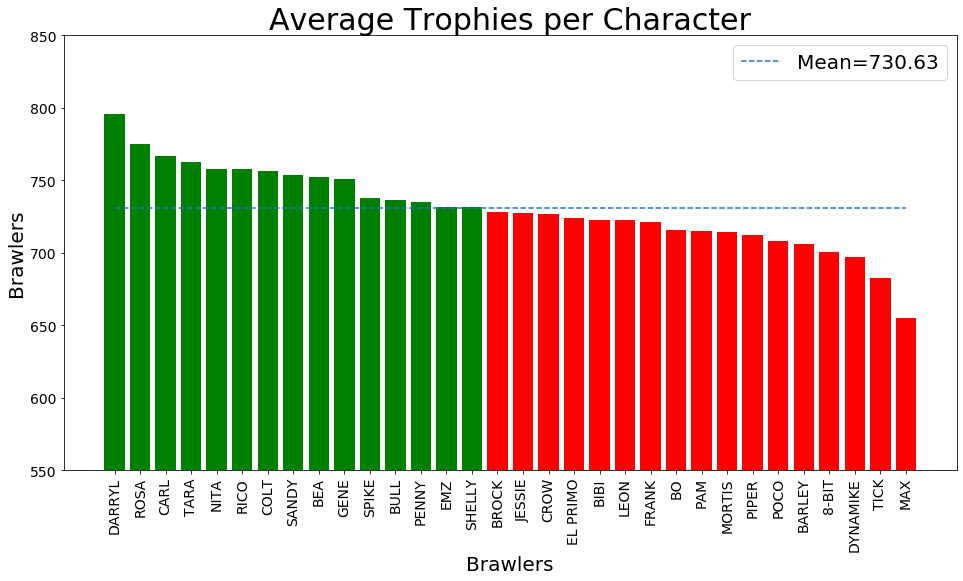

In [164]:
plot_avg_trophies(df)